In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Hitters.csv")
df.dropna(inplace=True)

In [ ]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [ ]:
rf_model.get_params()
# n_estimators : number of tree

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

344.8191624908484

**Model Tuning**

In [ ]:
rf_params = {"max_depth": [5,8,10],
             "max_features": [1,2,5,10],
             "n_estimators": [200,500,1000,2000],
             "min_samples_split": [2,5,10]}

In [21]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [22]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

**Tuned Model**

In [23]:
rf_tuned = RandomForestRegressor(max_depth=8,
                                 max_features=2,
                                 min_samples_split=2,
                                 n_estimators=200).fit(X_train, y_train)


In [24]:
y_pred = rf_tuned.predict(X_test)

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

354.95162729250904

**Hyperparameter significance level**

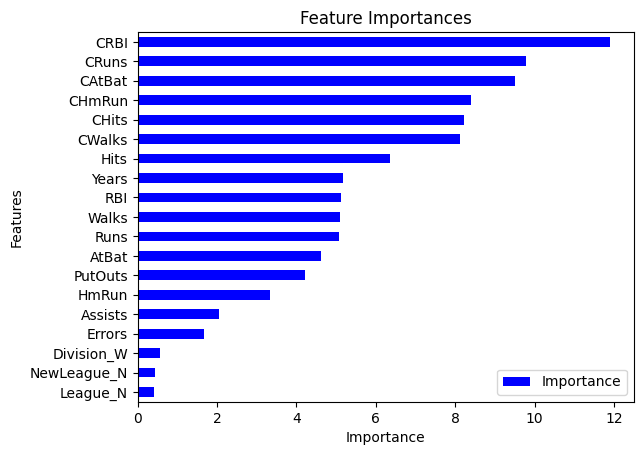

In [29]:
importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100,
                          "index": X_train.columns})

importance.sort_values(by="Importance",
                       axis = 0, # by rows
                       ascending=True).plot(x="index", y="Importance", kind="barh", color = "b")

plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()


**Visualization of the First Decision Tree from the Random Forest Model**

In [31]:
from ipywidgets import Image
import pydotplus
from sklearn.tree import export_graphviz
from six import StringIO

d_tree0 = rf_tuned.estimators_[0]
dot_data = StringIO()
export_graphviz(d_tree0, feature_names=X_train.columns,
                out_file=dot_data, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x1aM\x00\x00\x04\xa7\x08\x06\x00\x00\x00\xec\xc0i\x0…